# HEALTH_CARE_PREMIUM_PREDICTION

### IMPORTANT LIBRARIES

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

### READ DATA

In [188]:
df=pd.read_csv("premiums.csv")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [189]:
df.shape

(50000, 13)

### Data Cleaning  and EDA 

#### when you see the column name same have use space btween word and some have used '_' between work 

In [245]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [246]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


#### check for null value in any cell

In [192]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

##### As we can see that smoking status has 11 null values employee status have two null values and income level have 13 null value but we can also see that the data set we have given have 50000 imports or we can sit 50000 tuples so it basically doesn't affect more if we drop to these null values

In [193]:
df.dropna(inplace=True)
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


In [194]:
df.shape

(49976, 13)

#### check for duplicates

In [195]:
# df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [196]:
# hence there is no duplicate value but if we have so we can use df.drop_duplicates(inplace=True)

#### check for quick statistics

In [197]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


##### error 1 is numper dependent min is -1

In [198]:
df[df.number_of_dependants<0].shape
# let see the unique neg value
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [199]:
# here we need to talk
# solution actually the boss tell make them neg to pasitive

In [200]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df[df.number_of_dependants<0].shape


(0, 13)

#### Ploting

In [201]:
numeric_columns=df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

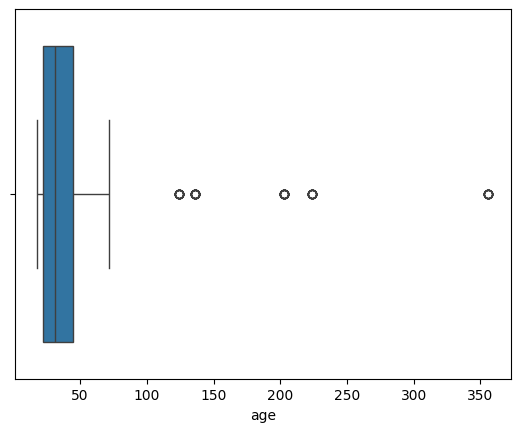

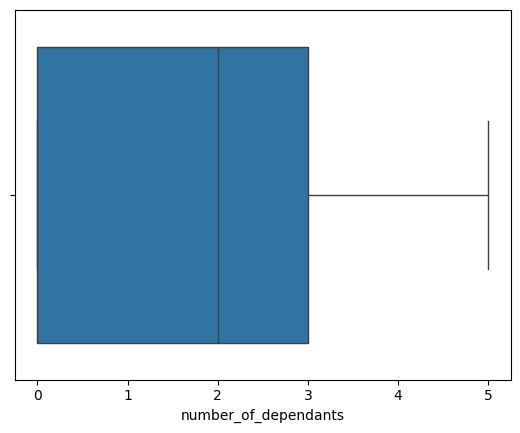

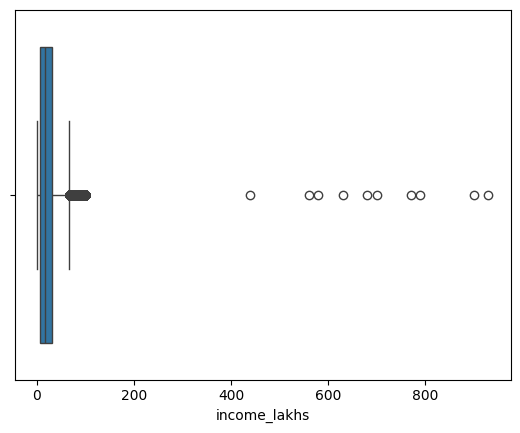

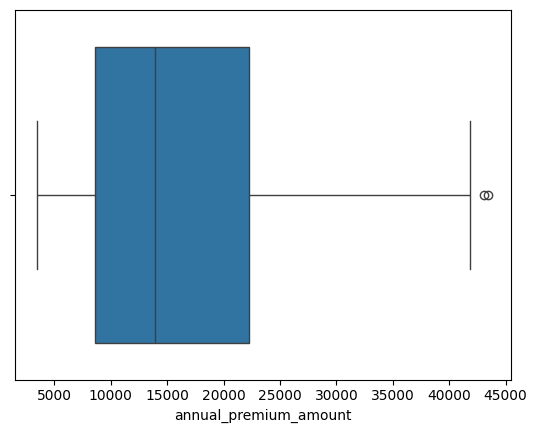

In [202]:

for col in numeric_columns:
 sns.boxplot(x=df[col])
 plt.show()

#  dots are outlier

#### error 2 max age is 356

In [203]:
df[df.age>100].shape

(58, 13)

In [204]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [205]:
df1=df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


#### error 3 income

In [206]:
df.income_lakhs.quantile([0.25, 0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [207]:
def get_iqr_bounds(col):
    Q1, Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound, upper_bound

In [208]:
get_iqr_bounds(df1.income_lakhs)

(-29.0, 67.0)

##### As you can see that our lower bound is minus 29 so it does not affect our data set why because the minimum income have given according to describe is one so it does not affect it but if you see the upper bound which is sixty seven lakh sixty seven lakh is something that are most common in India income so I think we can't go with this income because this is the most common income so we can do something other method

In [209]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

<Axes: xlabel='income_lakhs', ylabel='Count'>

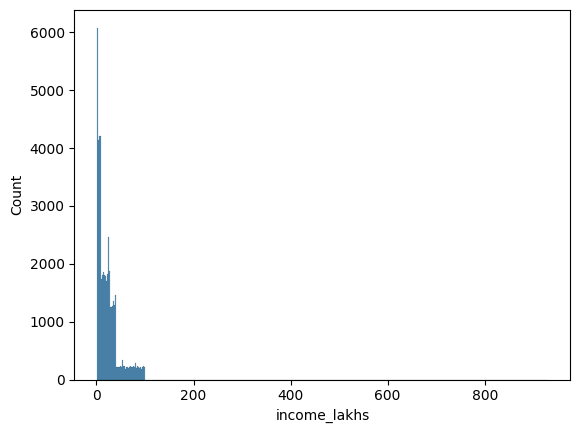

In [210]:
sns.histplot(df1.income_lakhs)

##### I think we can use quantile 0.99 as it was giving our upper bounders 100 that is 1,00,00,000 so 1,00,00,000 is something which can we take as an upper bound


In [211]:
df1[df1.income_lakhs>quantile_threshold].shape

(10, 13)

In [212]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


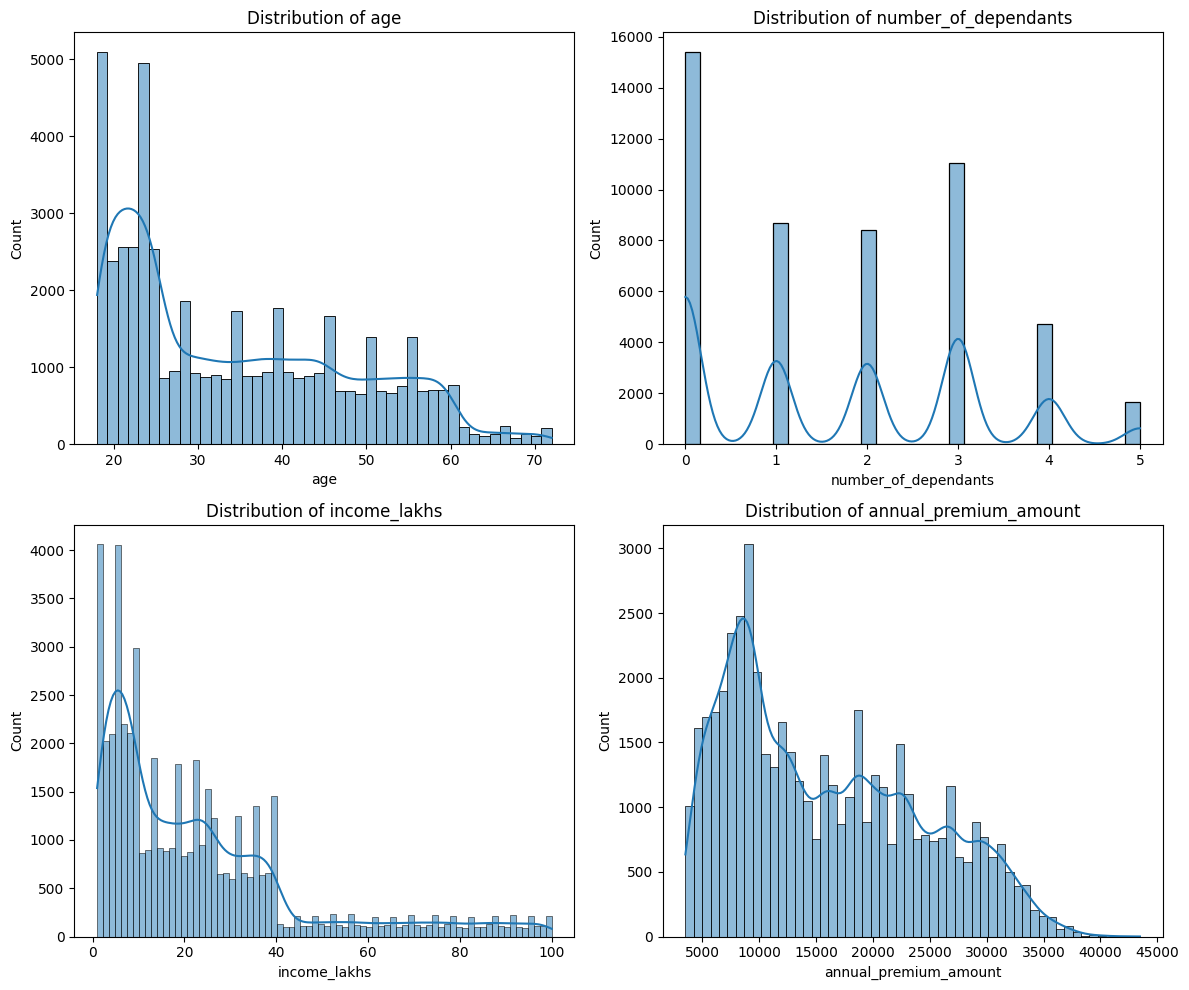

In [213]:
# for col in numeric_columns:
#     sns.histplot(df2[col], kde=True)
#     plt.show()




fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot each column
sns.histplot(df2[numeric_columns[0]], kde=True, ax=ax1)
ax1.set_title(f'Distribution of {numeric_columns[0]}')

sns.histplot(df2[numeric_columns[1]], kde=True, ax=ax2)
ax2.set_title(f'Distribution of {numeric_columns[1]}')

sns.histplot(df2[numeric_columns[2]], kde=True, ax=ax3)
ax3.set_title(f'Distribution of {numeric_columns[2]}')

sns.histplot(df2[numeric_columns[3]], kde=True, ax=ax4)
ax4.set_title(f'Distribution of {numeric_columns[3]}')

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

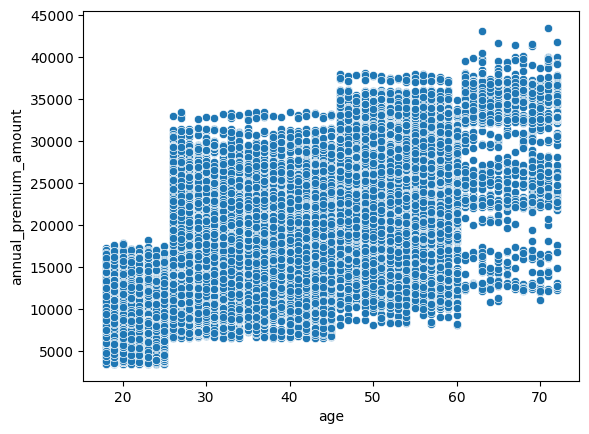

In [214]:
sns.scatterplot(df2, x='age', y='annual_premium_amount')

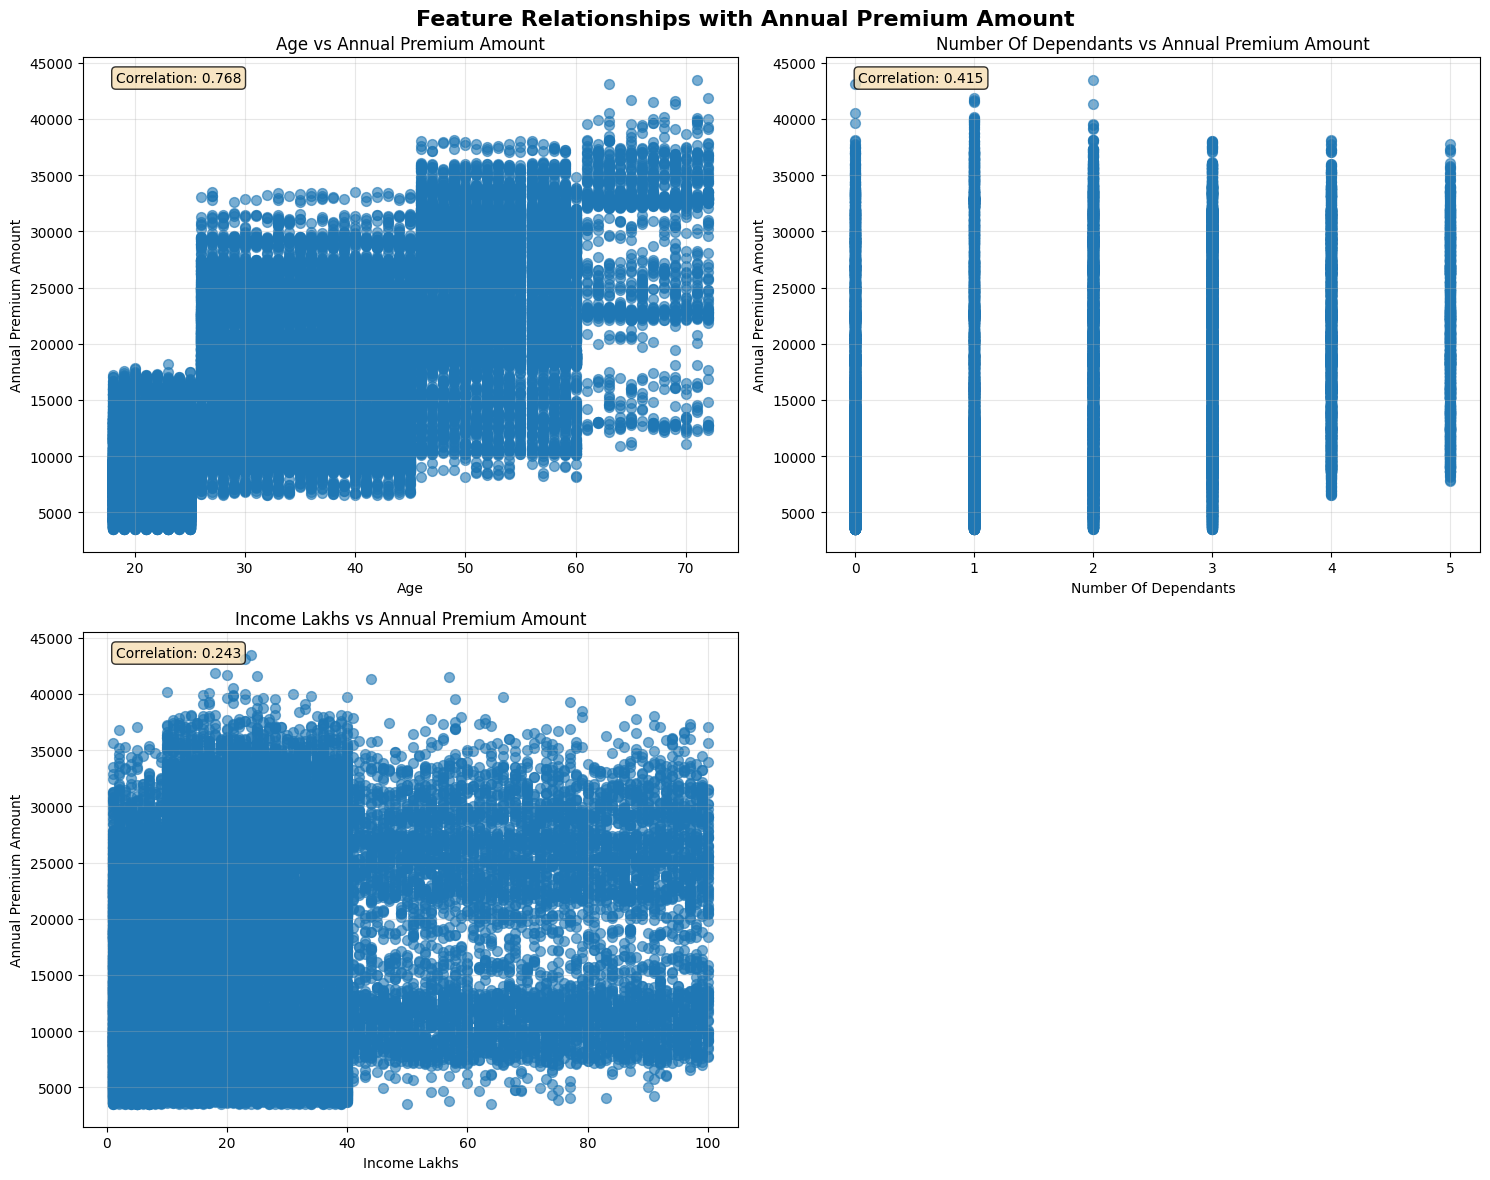

In [215]:
# Define your feature columns (excluding target)
feature_columns = ['age', 'number_of_dependants', 'income_lakhs']
target = 'annual_premium_amount'

# Create 2x2 subplot matrix
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Create scatter plots for each feature vs target
for i, col in enumerate(feature_columns):
    axes[i].scatter(df2[col], df2[target], alpha=0.6, s=50)
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Annual Premium Amount')
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Annual Premium Amount')
    axes[i].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation = df2[col].corr(df2[target])
    axes[i].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=axes[i].transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Remove the 4th empty subplot
fig.delaxes(axes[3])

plt.suptitle('Feature Relationships with Annual Premium Amount', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [216]:
categorial_cols=['gender', 'region', 'marital_status','income_level',
       'bmi_category', 'smoking_status', 'employment_status', 'medical_history', 'insurance_plan']

for col in categorial_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


##### as you see that smoking=0 , does not smoke, not smoking are equivalent to no smoking

In [217]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',  # Added comma here
    'Does Not Smoke': 'No Smoking',  # Added comma here
    'Not Smoking': 'No Smoking'  # No comma needed for last item
}, inplace=True)

df2['smoking_status'].unique()

C:\Users\Rudra Sharma\AppData\Local\Temp\ipykernel_18780\2115717767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [218]:
pct_count=df2['gender'].value_counts(normalize=True)
pct_count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

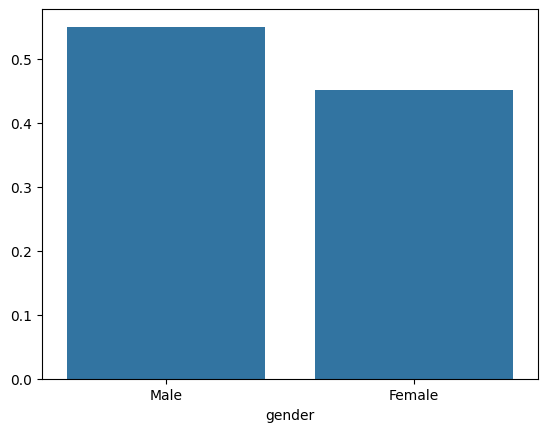

In [219]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

#### Now see the distribution in each category

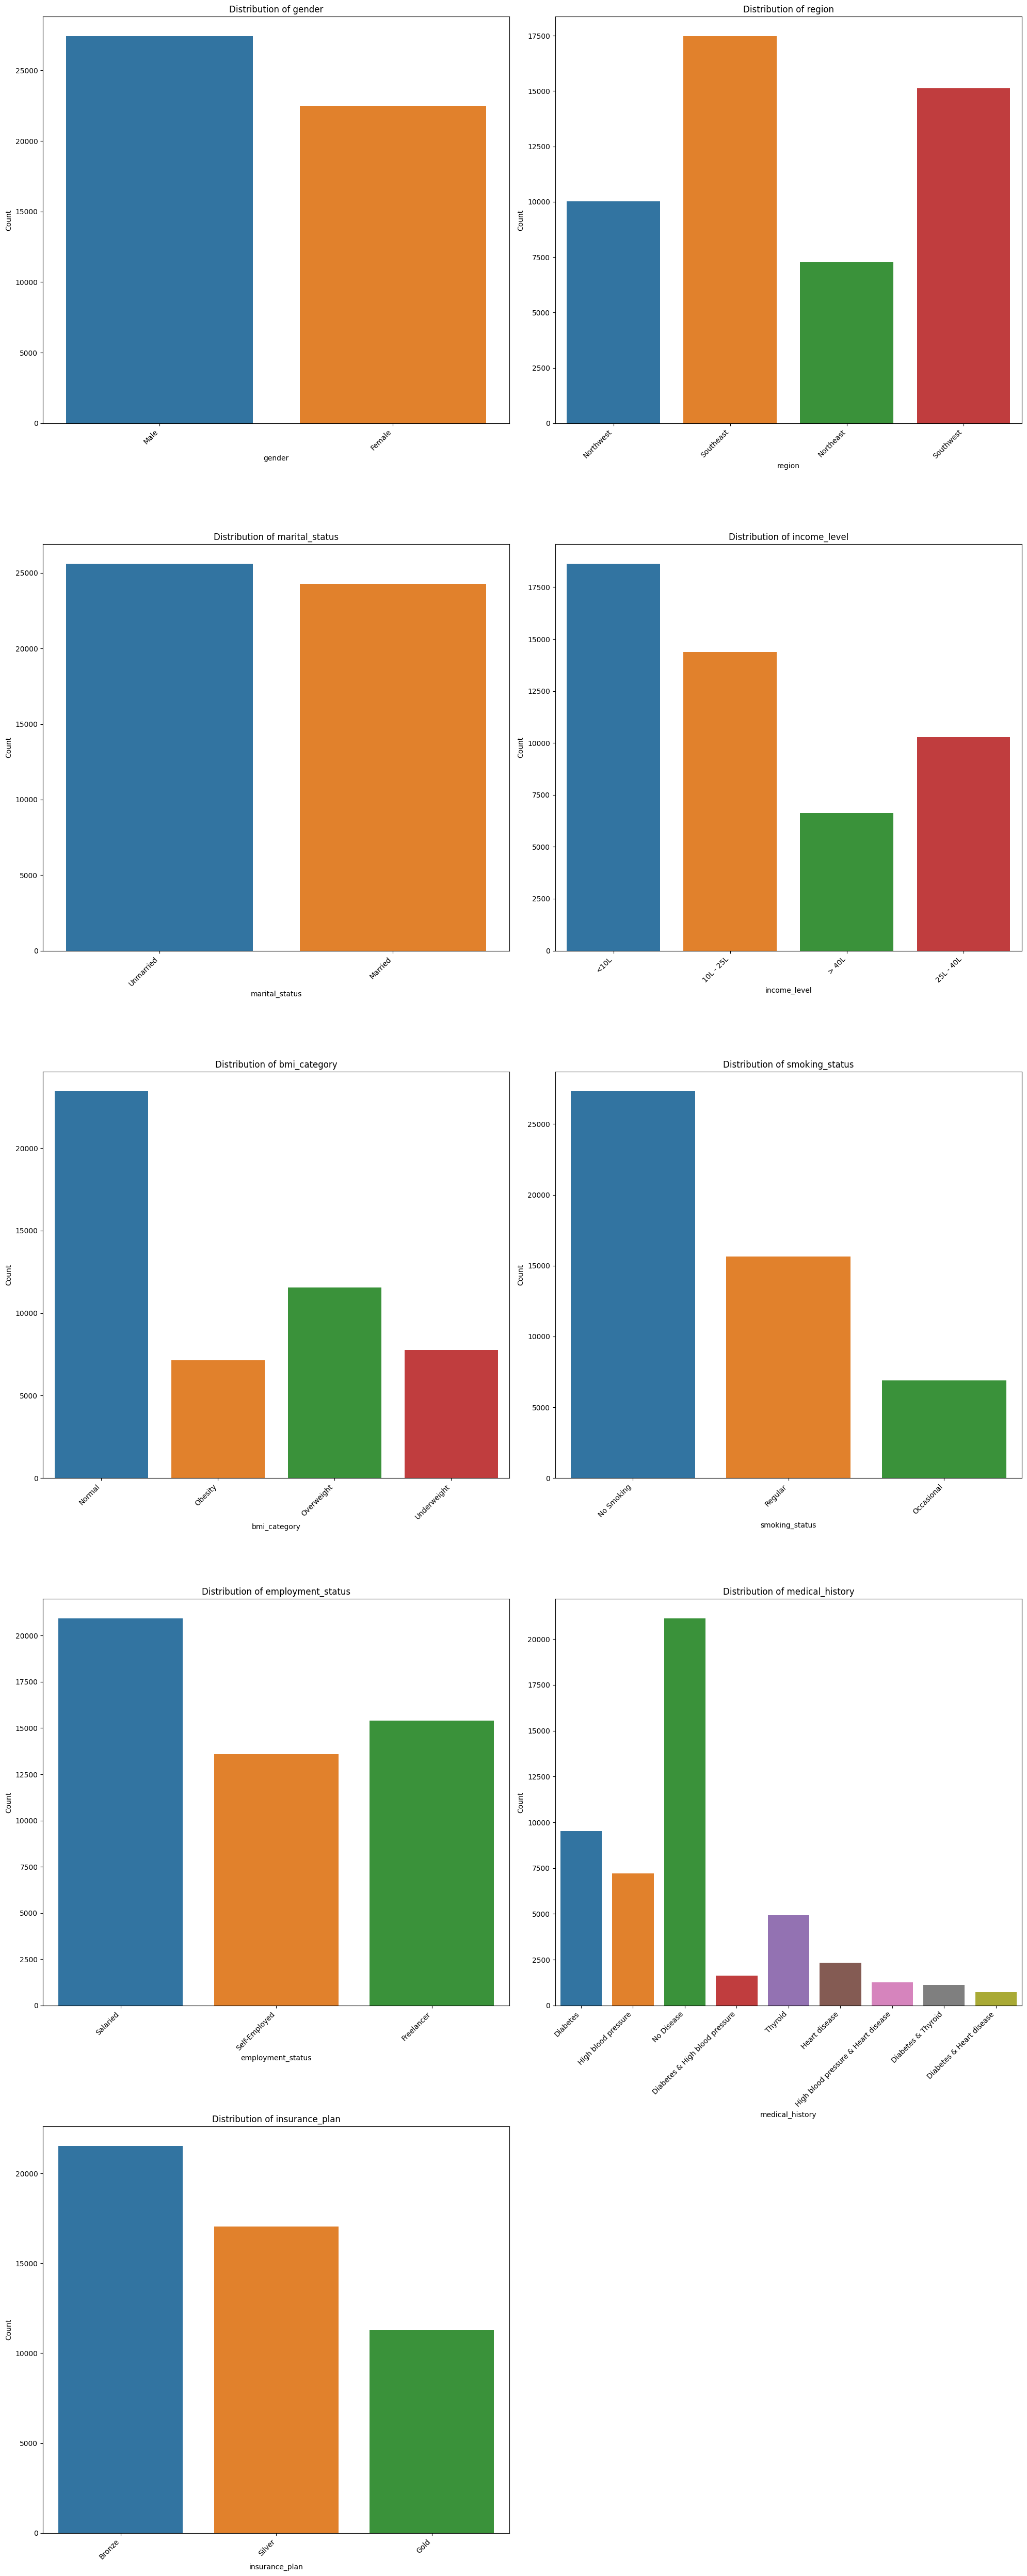

In [220]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = len(categorial_cols)
rows = math.ceil(n_cols / 2)

plt.figure(figsize=(20, rows * 10))


for i, col in enumerate(categorial_cols, 1):
    plt.subplot(rows, 2, i)
    sns.countplot(data=df2, x=col, hue=col, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### byvarieat relationship

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


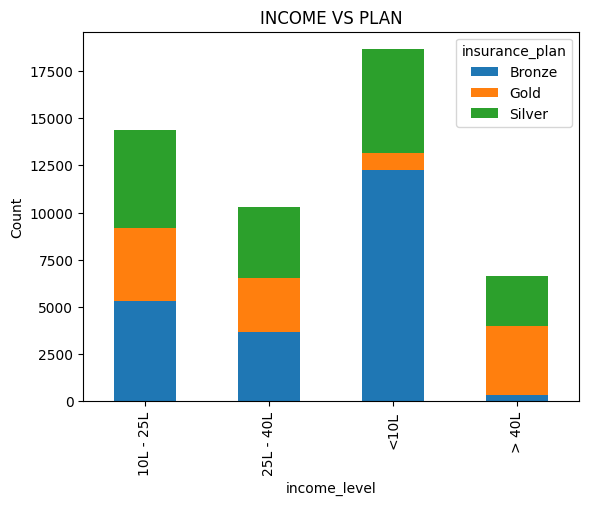

In [221]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(crosstab)

# crosstab.plot(kind='bar')
crosstab.plot(kind='bar',stacked=True)
plt.title("INCOME VS PLAN")
plt.ylabel('Count')
plt.show()

#### another way to visualize the same thing is

<Axes: xlabel='insurance_plan', ylabel='income_level'>

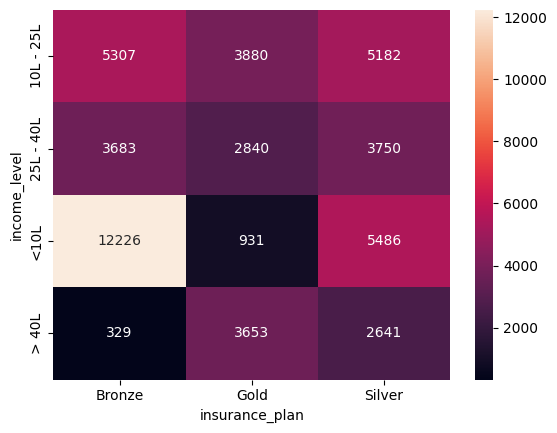

In [222]:
sns.heatmap(crosstab, annot=True, fmt='d')

### Feature Engineering

#### 1->medical history

In [276]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [277]:
risk_scores = {
    'none': 0,
    'no disease': 0,
    'thyroid': 5,
    'high blood pressure': 6,
    'diabetes': 6,
    'heart disease': 8
}

# Lowercase and split medical history
df2['medical_history'] = df2['medical_history'].str.lower()
df2[['disease1', 'disease2']] = df2['medical_history'].str.split('&', expand=True)

# Fill missing values and clean up
df2['disease1'] = df2['disease1'].str.strip().fillna('none')
df2['disease2'] = df2['disease2'].str.strip().fillna('none')

# Calculate total risk score
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)

# Normalize risk score
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
if max_score == min_score:
    df2['normalized_risk_score'] = 0
else:
    df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

# Show first 5 rows
df2.head(10)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,high blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,no disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,high blood pressure,Silver,13365,high blood pressure,none,6,0.428571
5,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,diabetes,Bronze,15610,diabetes,none,6,0.428571
6,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,4,diabetes & high blood pressure,Silver,20653,diabetes,high blood pressure,12,0.857143
7,43,Male,Northeast,Married,3,Overweight,Regular,Salaried,> 40L,46,thyroid,Gold,26926,thyroid,none,5,0.357143
8,59,Female,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,no disease,Gold,26101,no disease,none,0,0.000000
9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,no disease,Silver,11050,no disease,none,0,0.000000


In [225]:
# Since we only need normalized score for model fitting hence drop other from frame


#### ordinal category


In [154]:
df2.insurance_plan.unique()
# sinceit is a ordinally category i.e bronze<silver<gold  hence we can use label encoding


array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [278]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,high blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,no disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,high blood pressure,2,13365,high blood pressure,none,6,0.428571


In [281]:
print(df2['income_level'].unique())


['<10L' '10L - 25L' '> 40L' '25L - 40L']


In [282]:
df2['income_level'] = df2['income_level'].str.strip()


In [283]:
df2['income_level'] = df2['income_level'].map({
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4
}).fillna(0)  # or another default value

df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,high blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,no disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,high blood pressure,2,13365,high blood pressure,none,6,0.428571


#### Nominal-Category

In [284]:
nominal_cols=['gender', 'region', 'marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2, columns=nominal_cols, drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,high blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,no disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,high blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [285]:
#  as above i have mentioned that
# Since we only need normalized score for model fitting hence drop other from frame

df4=df3.drop(['medical_history', 'disease1', 'disease2','total_risk_score'], axis=1)
df4.head(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


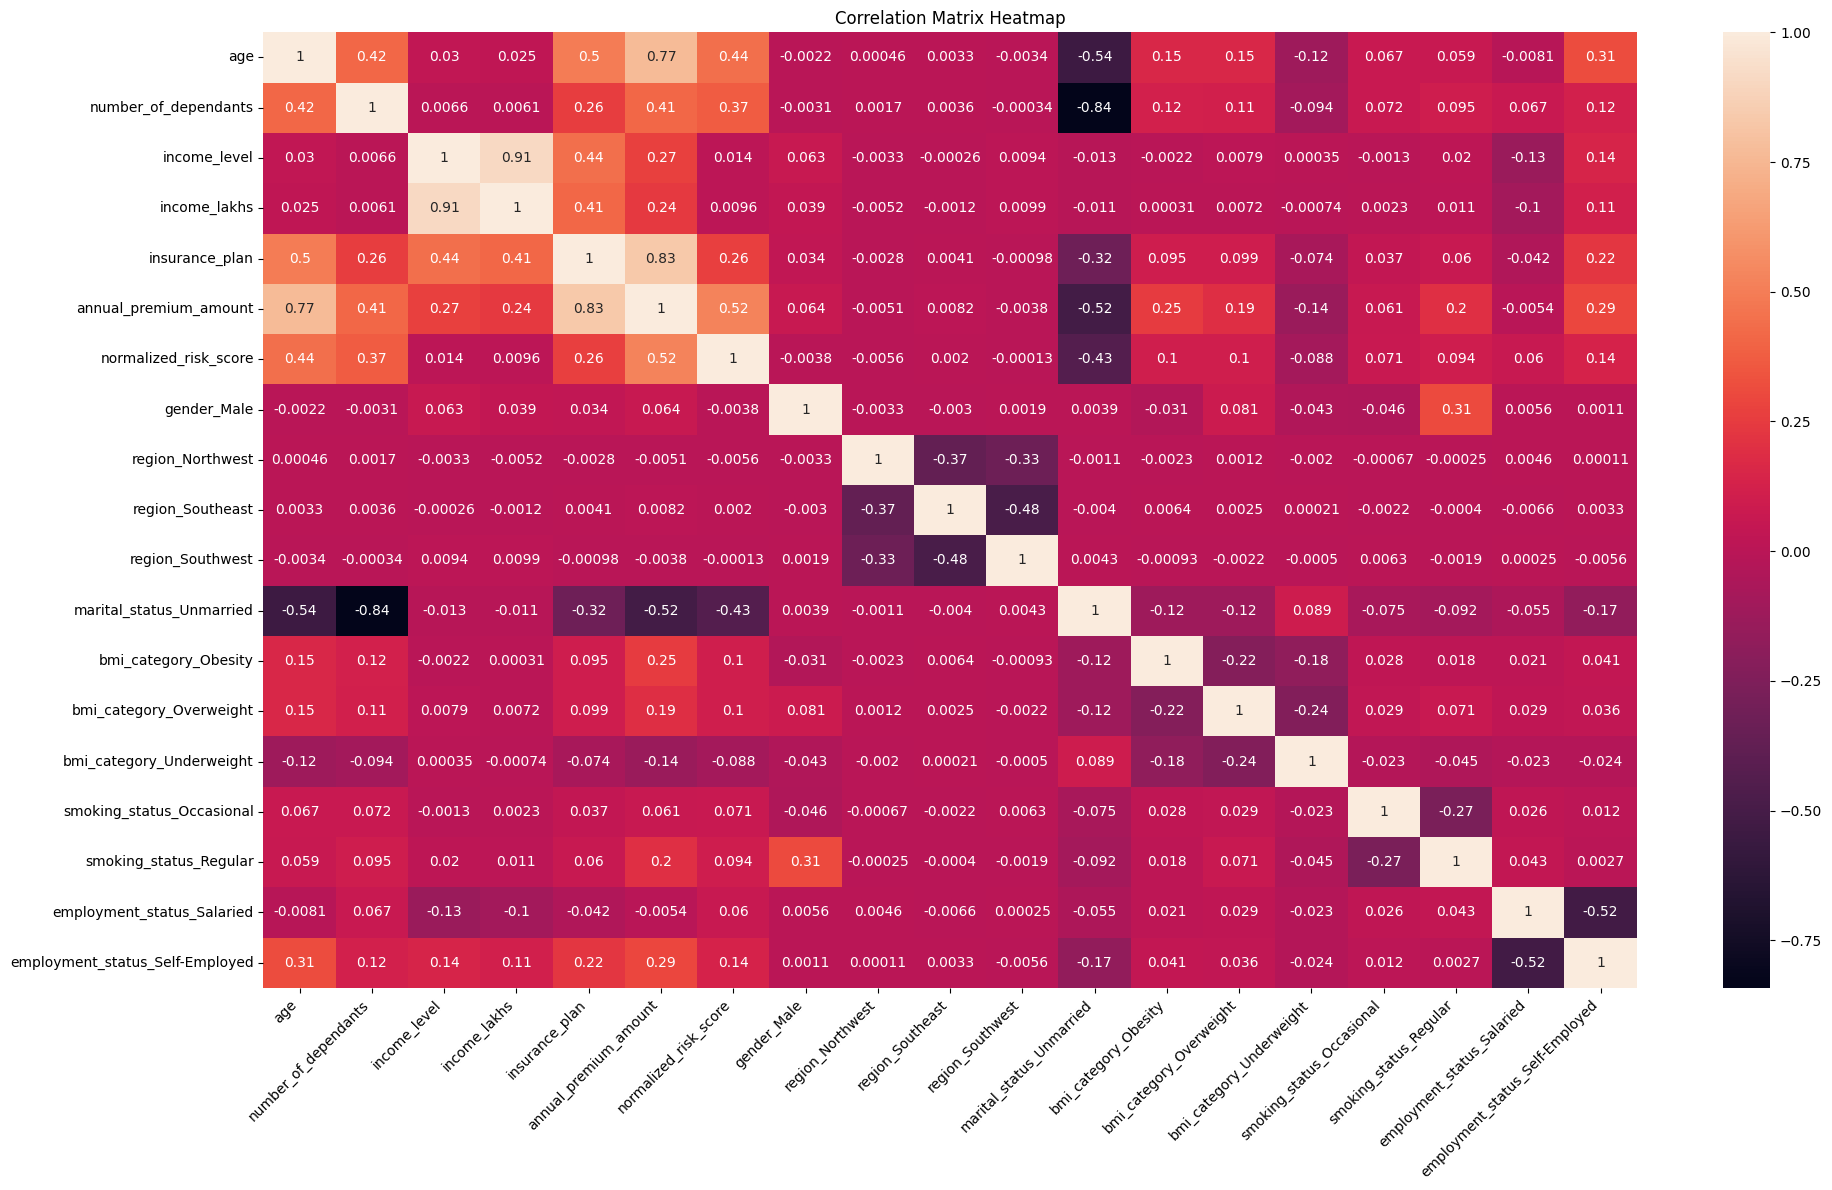

In [286]:
cm= df4.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [287]:
X=df4.drop('annual_premium_amount', axis='columns')
y=df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler=MinMaxScaler()

X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])

X.head() 

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [288]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [289]:
calculate_vif(X.drop('income_level', axis='columns'))


,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [290]:
X_reduced= X.drop('income_level' , axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### MODEL TRAINING
